In [37]:
import numpy as np  # 引入numpy、pandas库
import pandas as pd
import math
from dbfread import DBF
from pandas import DataFrame
import matplotlib.pyplot as plt
import proplot as plot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from IPython.display import display
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 刻度格式
import matplotlib.ticker as mticker  # 添加网格线
pd.options.display.max_columns = None


path = "./dataset/IBTrACS.WP.list.v04r00.lines.dbf"
df_raw = pd.DataFrame(iter(DBF(path)))

df = df_raw

In [151]:
'''
1. 选出每个台风编号
2. 找出单个编号的最大值大于35
'''
import math

Typh_times = df_1986['NUMBER'].value_counts().sort_index().reset_index() # 每个台风出现的次数
Typh_times.rename(columns={'NUMBER': 'times'})
ls_num_34 = []
ls_min = []
ls_max = []
for typh_num in Typh_times['index']:
    df_typh_num = df_1986[df_1986['NUMBER'] == typh_num]
    typh_num_max = df_typh_num['USA_WIND'].max()
#     print("The No. %d maxium is %.2f" %(typh_num, typh_num_max))
    if math.isnan(typh_num_max) is False:
        if typh_num_max > 34:
            ls_wind_indesity = list(df_typh_num['USA_WIND'])
            length_indesity = len(ls_wind_indesity)
            typh_num_min = df_typh_num['USA_WIND'].min()
            df_indesity_min = df_typh_num[df_typh_num['USA_WIND'] == typh_num_min]
            min_times = df_indesity_min['USA_WIND'].value_counts()
            min_times = min_times[int(typh_num_min)]
            ls_num_34.append(typh_num)
            ls_min.append(typh_num_min)
            ls_max.append(typh_num_max)
            print("The No. %d typhone minium is %.2f. and maximu is %.2f" 
                  %(typh_num, typh_num_min, typh_num_max))

print(ls_num_34, len(ls_num_34))
print(ls_min, len(ls_min))
print(ls_max, len(ls_max))

The No. 16 typhone minium is 30.00. and maximu is 85.00
The No. 44 typhone minium is 20.00. and maximu is 90.00
The No. 48 typhone minium is 40.00. and maximu is 150.00
The No. 50 typhone minium is 25.00. and maximu is 45.00
The No. 53 typhone minium is 30.00. and maximu is 80.00
The No. 55 typhone minium is 30.00. and maximu is 50.00
The No. 59 typhone minium is 30.00. and maximu is 140.00
The No. 62 typhone minium is 40.00. and maximu is 85.00
The No. 70 typhone minium is 30.00. and maximu is 55.00
The No. 74 typhone minium is 20.00. and maximu is 65.00
The No. 77 typhone minium is 25.00. and maximu is 80.00
The No. 78 typhone minium is 30.00. and maximu is 110.00
The No. 81 typhone minium is 15.00. and maximu is 90.00
The No. 83 typhone minium is 25.00. and maximu is 40.00
The No. 91 typhone minium is 25.00. and maximu is 95.00
The No. 94 typhone minium is 30.00. and maximu is 120.00
The No. 98 typhone minium is 35.00. and maximu is 100.00
The No. 100 typhone minium is 27.00. and ma

In [38]:
def filter_indesity(year):
    """
    int year: year
    return 返回满足年份year台风大小大于34的台风编号列表 以及最小台风大小
    """
    df_year = df[df['year'] == year]
    Typh_times = df_year['NUMBER'].value_counts().sort_index().reset_index() # 每个台风出现的次数
    Typh_times.rename(columns={'NUMBER': 'times'})
    ls_num_34 = []
    ls_min = []
    ls_max = []
    for typh_num in Typh_times['index']:
        df_typh_num = df_year[df_year['NUMBER'] == typh_num]
        typh_num_max = df_typh_num['USA_WIND'].max()
    #     print("The No. %d maxium is %.2f" %(typh_num, typh_num_max))
        if math.isnan(typh_num_max) is False:
            if typh_num_max > 64:
                ls_wind_indesity = list(df_typh_num['USA_WIND'])
                length_indesity = len(ls_wind_indesity)
                typh_num_min = df_typh_num['USA_WIND'].min()
                df_indesity_min = df_typh_num[df_typh_num['USA_WIND'] == typh_num_min]
                min_times = df_indesity_min['USA_WIND'].value_counts()
                min_times = min_times[int(typh_num_min)]
                ls_num_34.append(typh_num)
                ls_min.append(typh_num_min) 
                ls_max.append(typh_num_max)

    return ls_num_34, ls_min, ls_max

def filter_min_and_max(year, num):
    """
    int TpyhoneNomber:  num
    return 返回当前year年份的编号为num的最小台风数据和最大台风数据 dataframe
    """
    df_year = df[df['year'] == year]
    df_typh_num = df_year[df_year['NUMBER'] == num]
    typh_num_max = df_typh_num['USA_WIND'].max() # 查找最大值
#     print("The No. %d maxium is %.2f" %(typh_num, typh_num_max))

    ls_wind_indesity = list(df_typh_num['USA_WIND']) #列出台风风速的列表
    # length_indesity = len(ls_wind_indesity)  # 求长度
    typh_num_min = df_typh_num['USA_WIND'].min() # 找出最小台风风速

    df_indesity_min = df_typh_num[df_typh_num['USA_WIND'] == typh_num_min] # 设置最小台风风速的dataframe结构
    # min_counts = df_indesity_min['USA_WIND'].value_counts() #计算最小值出现了多少次
    # min_counts[int(typh_num_min)]
    # df_indesity_min[:1]

    df_indesity_max = df_typh_num[df_typh_num['USA_WIND'] == typh_num_max] # 设置最大台风风速的dataframe结构
    return df_indesity_min, df_indesity_max
    
def aptitude(year_list):
    """
    year_list: einino, lanina, neutrual
    """
    df_aptitude_min = pd.DataFrame(columns=["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"])
    df_aptitude_max = pd.DataFrame(columns=["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"])

    for year in year_list:
        ls_num_34_year, ls_min_year, ls_max_year = filter_indesity(year)
        for number, min_typh in zip(ls_num_34_year, ls_min_year):
            df_indesity_min, df_indesity_max = filter_min_and_max(year, number)
            df_aptitude_min = df_aptitude_min.append(df_indesity_min[0:1].loc[df_indesity_min['USA_WIND'] == min_typh, ["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"]], ignore_index=True)
        for number, max_typh in zip(ls_num_34_year, ls_max_year):
            df_indesity_min, df_indesity_max = filter_min_and_max(year, number)
            df_aptitude_max = df_aptitude_max.append(df_indesity_max[0:1].loc[df_indesity_max['USA_WIND'] == max_typh, ["SEASON", "NUMBER", "LAT", "LON", "USA_WIND"]], ignore_index=True)

    return df_aptitude_min, df_aptitude_max

# def main():
    """
    厄尔尼诺年(1982、1986-1987、1991、1994、1997、2002、2004、2009、2015)。
    拉尼娜年(1988、1995、1998-2000、2007、2010-2011，2016、2020-2021).
    中立年份(1983-1985、1989-1990、1992-1993、1995-1996、2001、2003、2005-2006、2008、2012-2014、2017-2019)
    """

einino = [1986,1987,1991,1994,1997,2002,2004,2009,2015]
lanina = [1988, 1995, 1998, 1998, 2000, 2007, 2010, 2011, 2016, 2020, 2021]
neutrual = [1983, 1984, 1985, 1989, 1990, 1992, 1993, 1995, 1996, 2001, 2003, 2005, 2006, 2008, 2012, 2013, 2014, 2017, 2018, 2019]

df_aptitude_einino_min,  df_aptitude_einino_max= aptitude(einino)
df_aptitude_lanina_min,  df_aptitude_lanina_max = aptitude(lanina)
df_aptitude_neutrual_min,  df_aptitude_neutrual_max =  aptitude(neutrual)
    
    # 分别指定`GeoAxes`所处的投影和刻度所处的投影.
#     map_proj = ccrs.PlateCarree(central_longitude=180)
#     tick_proj = ccrs.PlateCarree(central_longitude=0)
    
#     plt.subplot(2,3,1)
        
#     fig, ax = plt.subplots(
#         nrows=1, ncols=1, figsize=(20, 10),
#         subplot_kw={'projection': map_proj}
#     )

#     ax.set_global()
#     ax.add_feature(cfeature.LAND)
#     ax.add_feature(cfeature.OCEAN)
#     ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
#     ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)

#     ax.xaxis.set_major_formatter(LongitudeFormatter())
#     ax.yaxis.set_major_formatter(LatitudeFormatter())


#     ax.scatter(df_aptitude_einino_min['LON'], df_aptitude_einino_min['LAT'],
#             s=10, c = 'r', marker = 'o', 
#             transform=ccrs.PlateCarree())

#     ax.scatter(df_aptitude_einino_max['LON'], df_aptitude_einino_max['LAT'],
#             s=10, c = 'b', marker = '*', 
#             transform=ccrs.PlateCarree())
    
print(df_aptitude_einino_min)
print(df_aptitude_einino_max)
print(df_aptitude_lanina_min)
print(df_aptitude_lanina_max)
print(df_aptitude_neutrual_min)
print(df_aptitude_neutrual_max)

# if __name__ == "__main__":
#     main()


    SEASON NUMBER    LAT     LON  USA_WIND
0     1986     16   4.39  143.46      30.0
1     1986     44  11.12  133.44      20.0
2     1986     48   7.77  159.74      40.0
3     1986     53  14.13  129.21      30.0
4     1986     59  13.78  151.74      30.0
..     ...    ...    ...     ...       ...
172   2015     88  19.06  166.16      40.0
173   2015     92  14.37  148.91      20.0
174   2015     93  13.00  160.22      25.0
175   2015    102   3.95  163.85      25.0
176   2015    108   7.92  140.99      20.0

[177 rows x 5 columns]
    SEASON NUMBER    LAT     LON  USA_WIND
0     1986     16  18.62  136.52      85.0
1     1986     44   9.94  139.25      90.0
2     1986     48  12.39  155.27     150.0
3     1986     53  22.42  121.76      80.0
4     1986     59  16.70  130.38     140.0
..     ...    ...    ...     ...       ...
172   2015     88  25.18  150.75      70.0
173   2015     92  15.93  123.12     130.0
174   2015     93  19.82  140.15     125.0
175   2015    102  11.25  142.

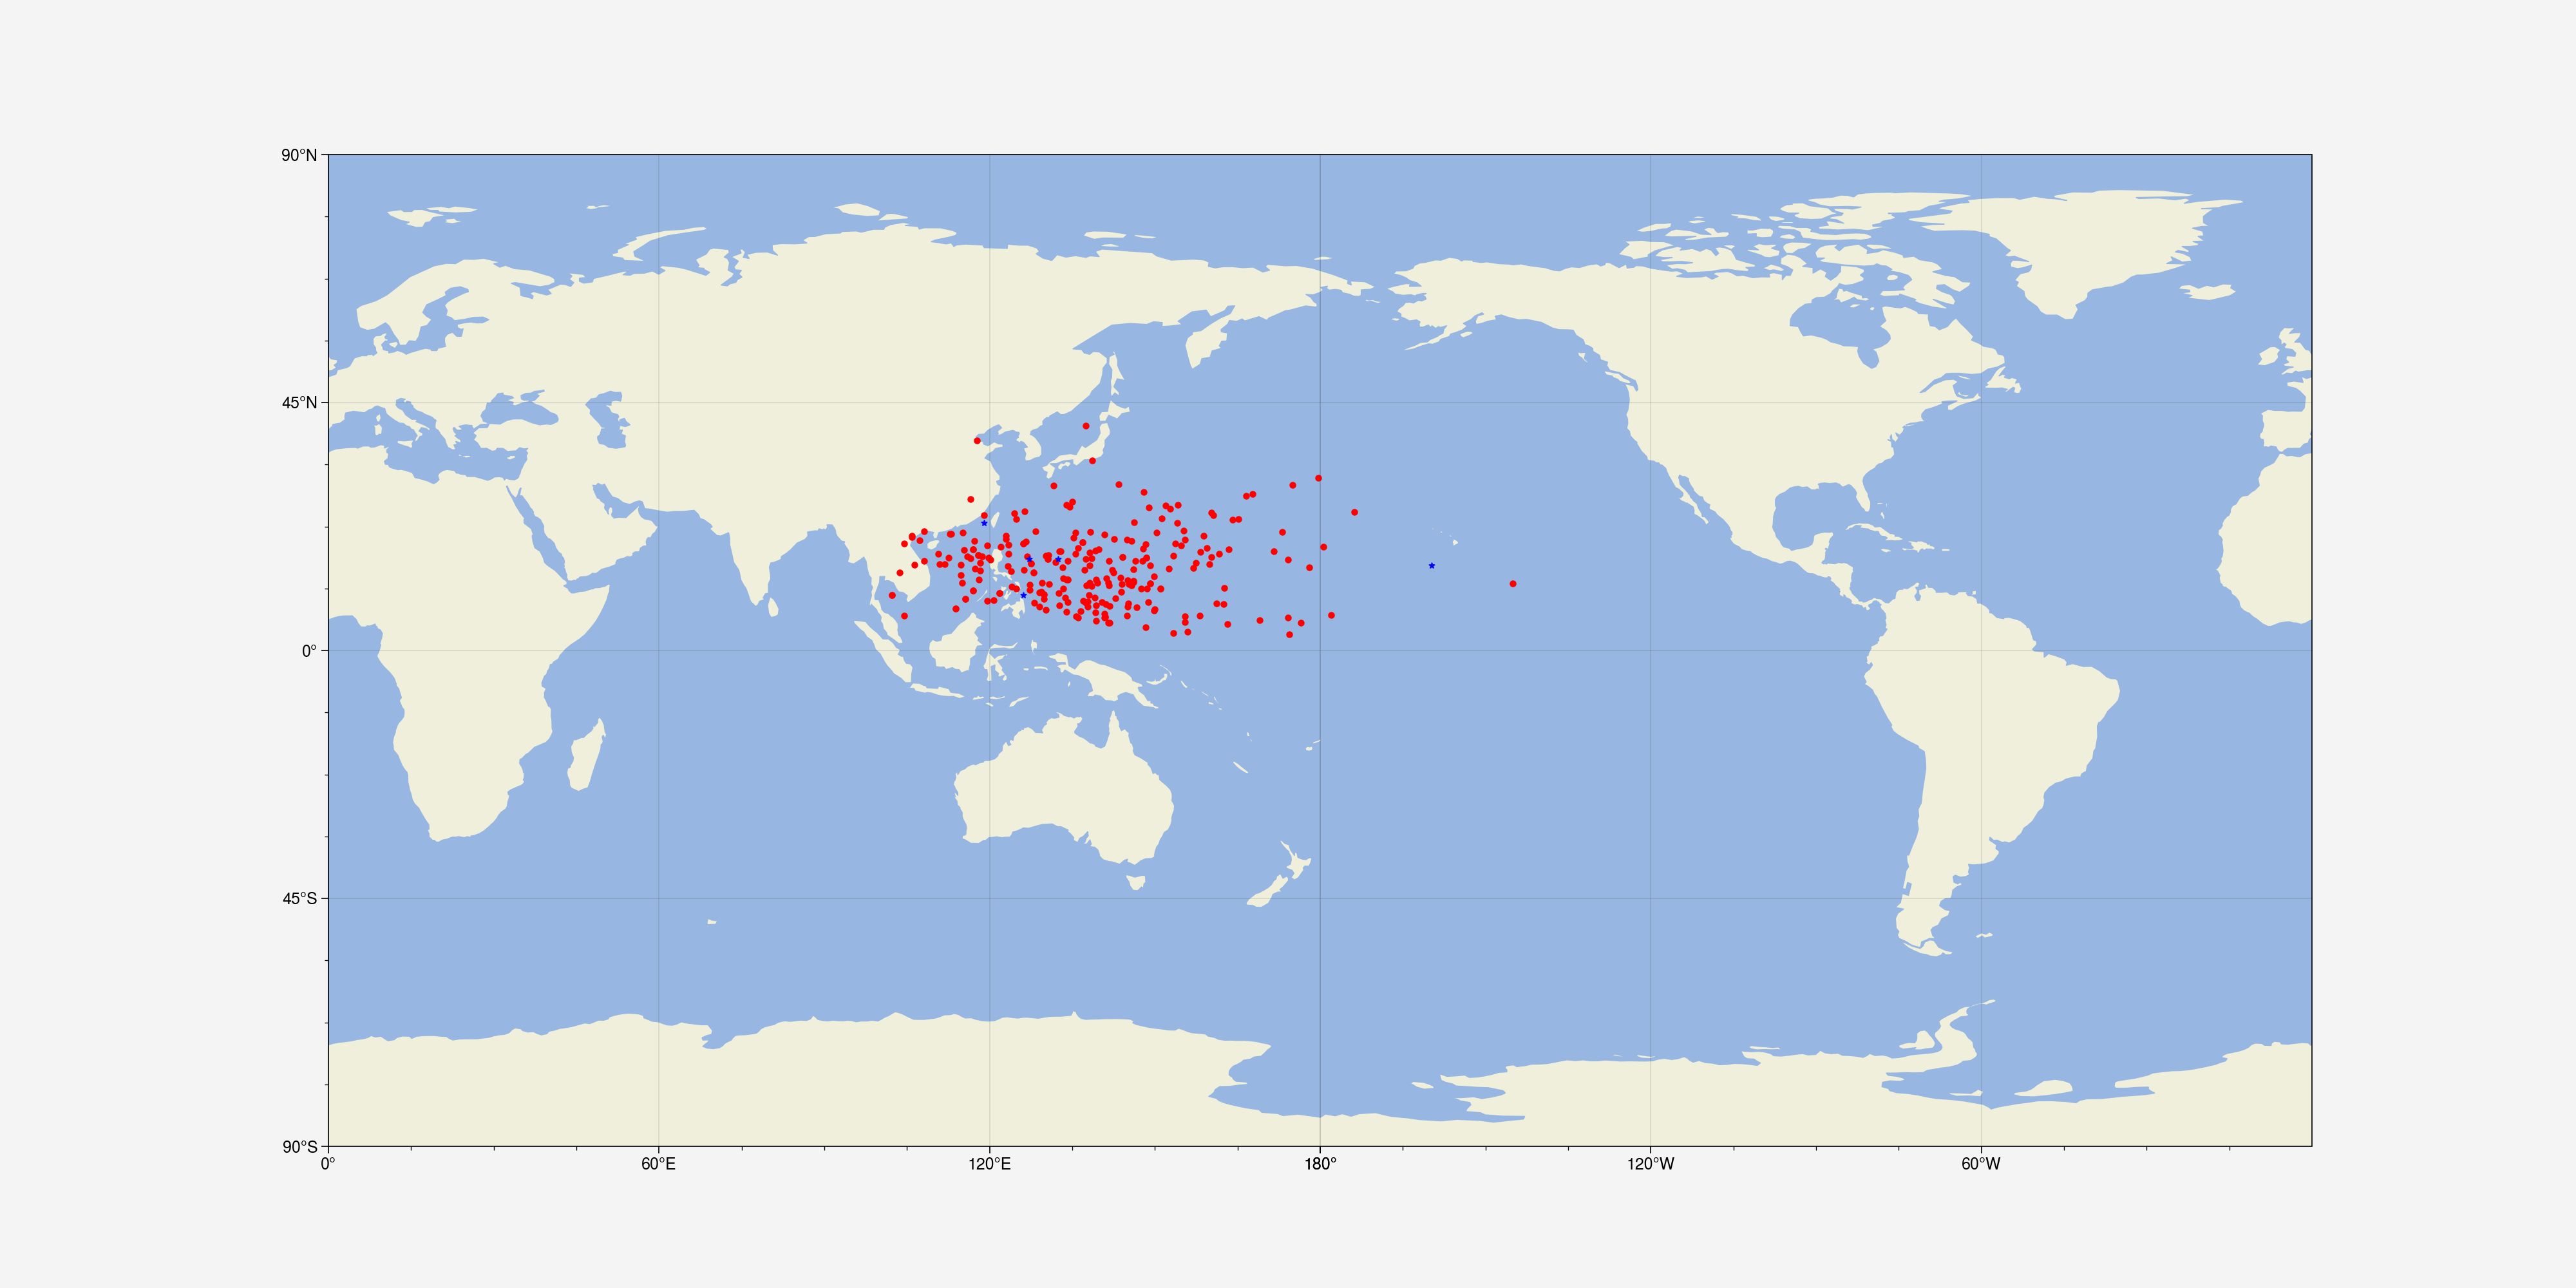

In [173]:
# 分别指定`GeoAxes`所处的投影和刻度所处的投影.
map_proj = ccrs.PlateCarree(central_longitude=180)
tick_proj = ccrs.PlateCarree(central_longitude=0)

fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(20, 10),
    subplot_kw={'projection': map_proj}
)

ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)

ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())


ax.scatter(df_aptitude_lanina_min['LON'], df_aptitude_lanina_min['LAT'],
        s=10, c = 'r', marker = 'o', 
        transform=ccrs.PlateCarree())

ax.scatter(df_aptitude_lanina_max['LON'], df_aptitude_lanina_max['LAT'],
        s=10, c = 'b', marker = '*', 
        transform=ccrs.PlateCarree())

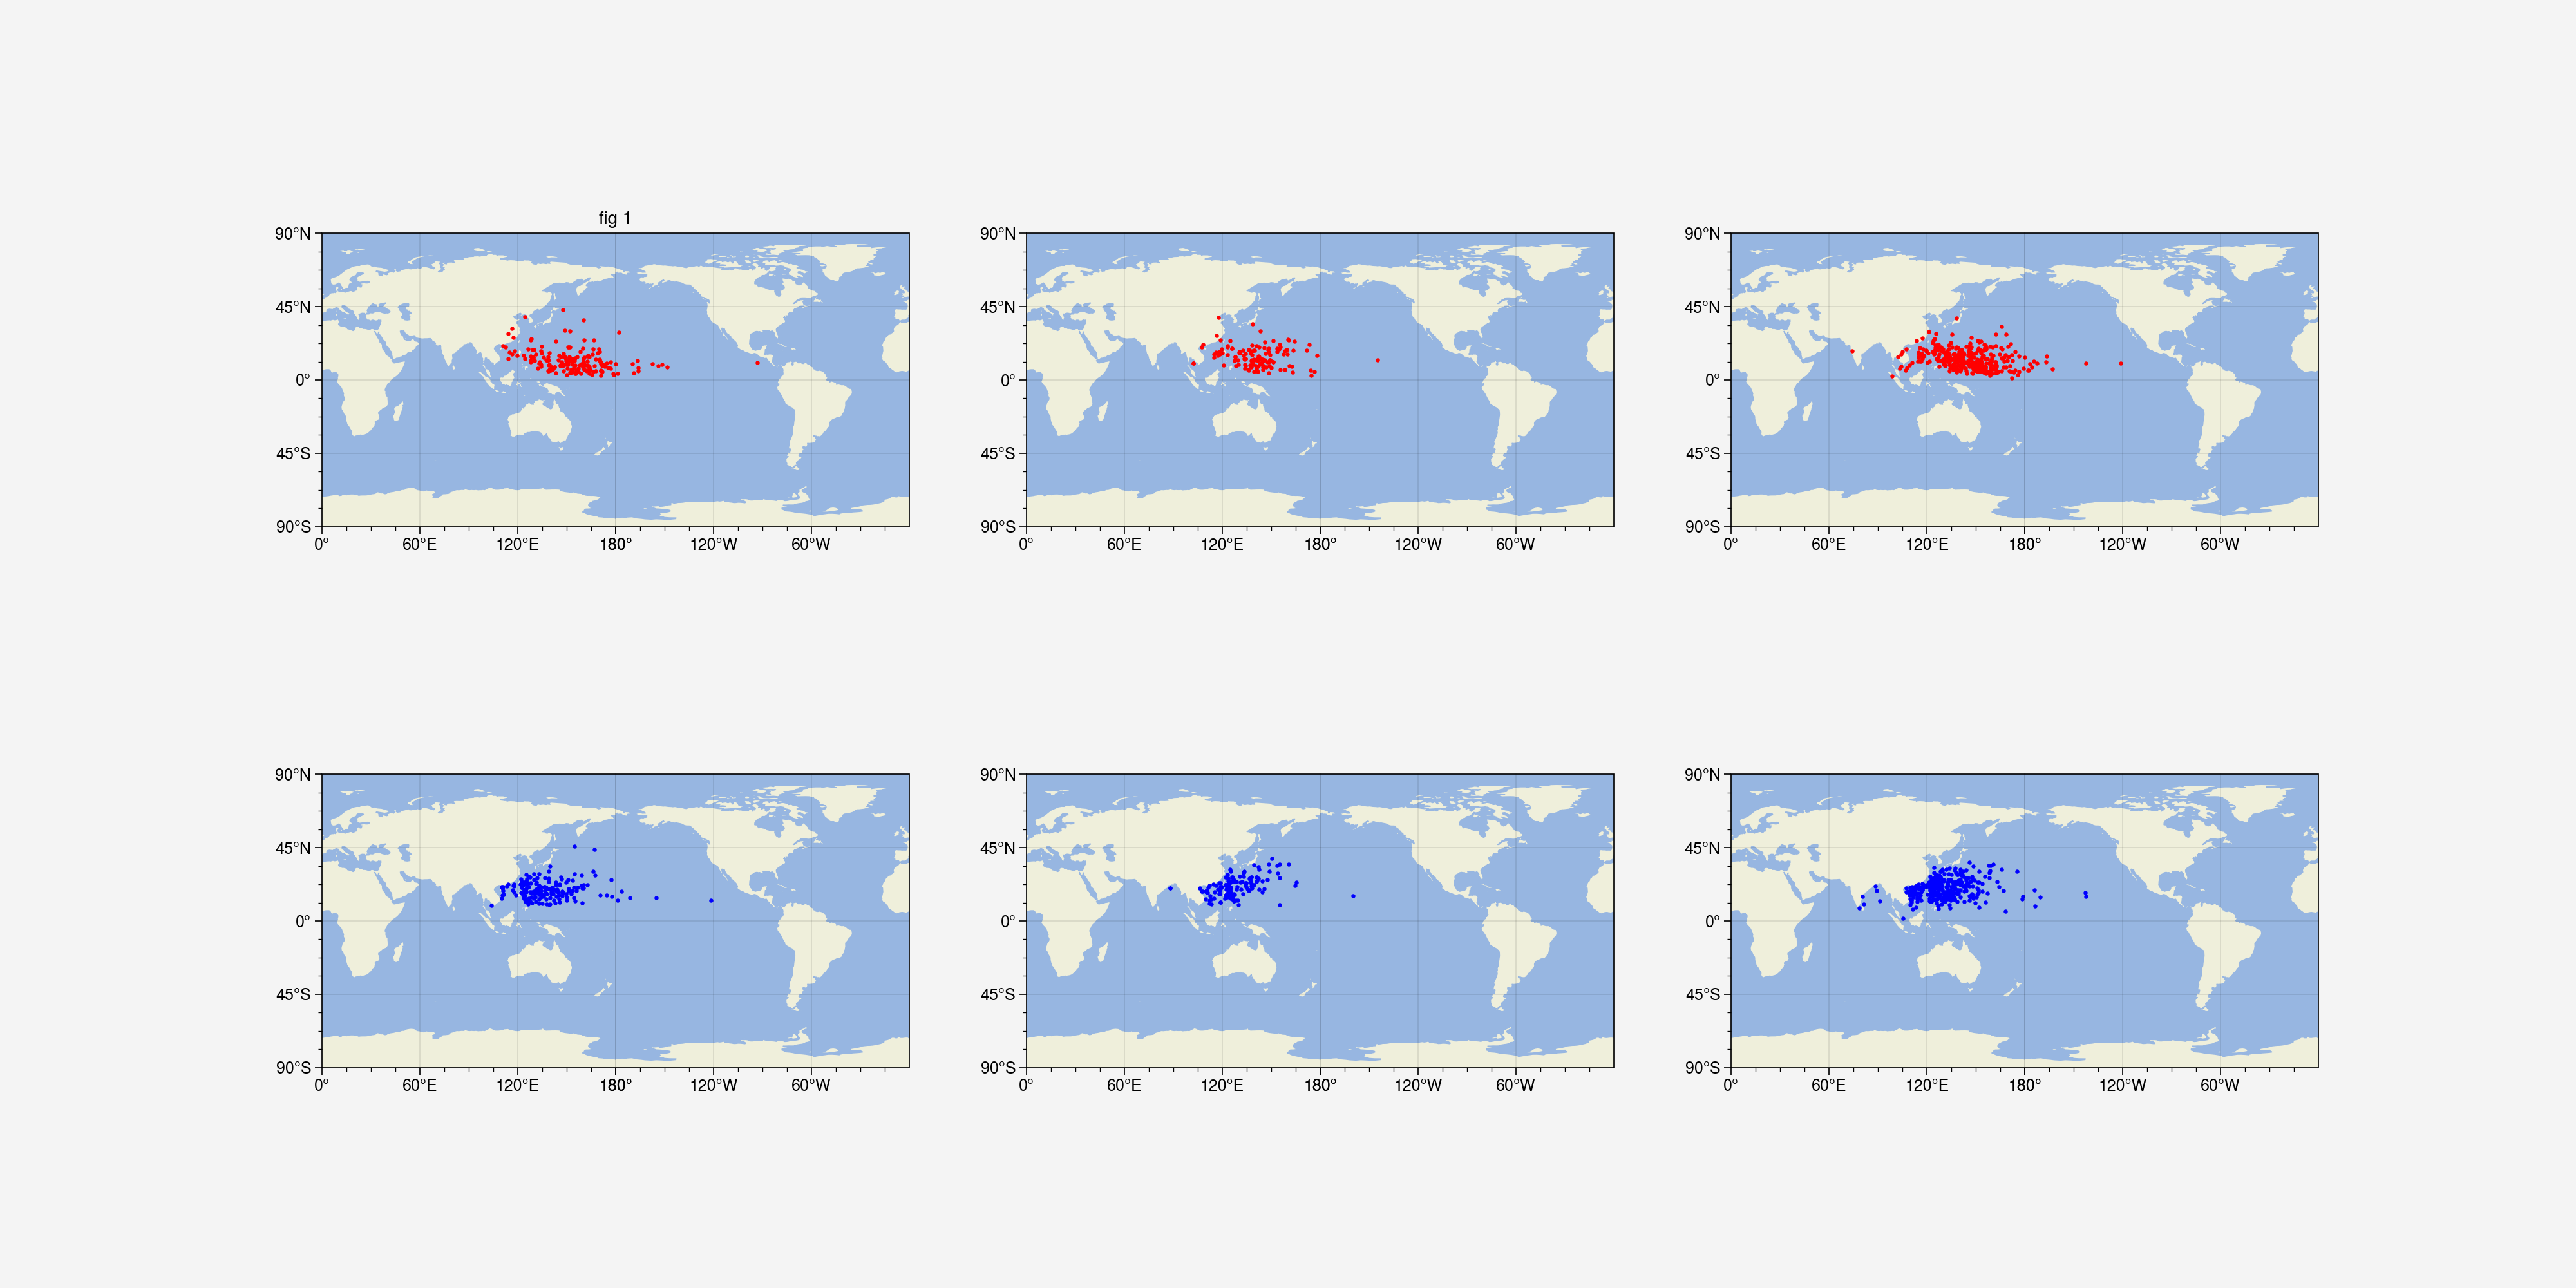

In [39]:
map_proj = ccrs.PlateCarree(central_longitude=180)
tick_proj = ccrs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=[20, 10])

ax1 =fig.add_subplot(2,3,1,projection=map_proj)
ax1.set_global()
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax1.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.set_title("fig 1")
ax1.scatter(df_aptitude_einino_min['LON'], df_aptitude_einino_min['LAT'],
        s=3, c = 'r', marker = 'o', 
        transform=ccrs.PlateCarree())

ax2 =fig.add_subplot(2,3,4,projection=map_proj)
ax2.set_global()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax2.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())
ax2.scatter(df_aptitude_einino_max['LON'], df_aptitude_einino_max['LAT'],
        s=3, c = 'b', marker = 'o', 
        transform=ccrs.PlateCarree())

ax3 =fig.add_subplot(2,3,2,projection=map_proj)
ax3.set_global()
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.OCEAN)
ax3.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax3.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
ax3.scatter(df_aptitude_lanina_min['LON'], df_aptitude_lanina_min['LAT'],
        s=3, c = 'r', marker = 'o', 
        transform=ccrs.PlateCarree())

ax4 =fig.add_subplot(2,3,5,projection=map_proj)
ax4.set_global()
ax4.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.OCEAN)
ax4.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax4.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
ax4.scatter(df_aptitude_lanina_max['LON'], df_aptitude_lanina_max['LAT'],
        s=3, c = 'b', marker = 'o', 
        transform=ccrs.PlateCarree())

ax5 =fig.add_subplot(2,3,3,projection=map_proj)
ax5.set_global()
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.OCEAN)
ax5.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax5.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax5.xaxis.set_major_formatter(LongitudeFormatter())
ax5.yaxis.set_major_formatter(LatitudeFormatter())
ax5.scatter(df_aptitude_neutrual_min['LON'], df_aptitude_neutrual_min['LAT'],
        s=3, c = 'r', marker = 'o', 
        transform=ccrs.PlateCarree())

ax6 =fig.add_subplot(2,3,6,projection=map_proj)
ax6.set_global()
ax6.add_feature(cfeature.LAND)
ax6.add_feature(cfeature.OCEAN)
ax6.set_xticks(np.linspace(-180, 180, 7), crs=tick_proj)
ax6.set_yticks(np.linspace(-90, 90, 5), crs=tick_proj)
ax6.xaxis.set_major_formatter(LongitudeFormatter())
ax6.yaxis.set_major_formatter(LatitudeFormatter())
ax6.scatter(df_aptitude_neutrual_max['LON'], df_aptitude_neutrual_max['LAT'],
        s=3, c = 'b', marker = 'o', 
        transform=ccrs.PlateCarree())